<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_Dip_Passive_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv ('RUT.csv')

In [0]:
df['Month'] = pd.DatetimeIndex (df['Date']).month
df['Day'] = pd.DatetimeIndex (df['Date']).day

In [0]:
df['Change30'] = df['Close'].pct_change(periods=30)
df['Change20'] = df['Close'].pct_change(periods=20)
df['Change10'] = df['Close'].pct_change(periods=10)
df['Change5D'] = df['Close'].pct_change(periods=5)
df['Change1D'] = df['Close'].pct_change(periods=1)

In [0]:
df_final = df.dropna()
df_final.reset_index (inplace=True)

In [916]:
df_final.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Month,Day,Change30,Change20,Change10,Change5D,Change1D
0,30,1987-10-22,130.649994,130.649994,124.470001,124.570000,124.570000,3922000,10,22,-0.262769,-0.261676,-0.254340,-0.219780,-0.046537
1,31,1987-10-23,124.580002,124.580002,121.360001,121.589996,121.589996,2456000,10,23,-0.287029,-0.279893,-0.268059,-0.203941,-0.023922
2,32,1987-10-26,121.580002,121.580002,110.320000,110.330002,110.330002,3088000,10,26,-0.352637,-0.349162,-0.326681,-0.174177,-0.092606
3,33,1987-10-27,110.320000,113.120003,108.370003,108.510002,108.510002,2602000,10,27,-0.358688,-0.358157,-0.338918,-0.106104,-0.016496
4,34,1987-10-28,105.459999,108.500000,105.459999,106.080002,106.080002,2794000,10,28,-0.372010,-0.378959,-0.344335,-0.188060,-0.022394


In [917]:
np.min (df_final['Change1D'])

-0.11850616355076216

In [0]:
loss_mean = np.mean (df_final['Change1D'] [df_final['Change1D'] < 0]) 
loss_std = np.std (df_final['Change1D'] [df_final['Change1D'] < 0])

ex_loss = loss_mean - 2*loss_std

In [919]:
print (ex_loss, loss_mean)

-0.028879104081609045 -0.009200262888693893


In [0]:
t = len (df_final)

In [0]:
month = df_final['Month'].values
day = df_final['Day'].values
change = df_final['Change1D'].values
price = df_final['Close'].values
date = df_final['Date'].values

In [0]:
date = np.array ([datetime.strptime(i, '%Y-%m-%d') for i in date])

In [923]:
timedelta ()

datetime.timedelta(0)

In [0]:
middle = []
first = []
rule = []

In [0]:
m = date[0].month + 1

for i in range(len(price)-1):
  if (date[i].day >= 15) and (month[i] == m):
    middle.append (date[i])
    m = (date[i]+relativedelta(months=1)).month

In [0]:
m = date[0].month + 1

for i in range(len(price)-1):
  if (change[i] < ex_loss) and (month[i] == m):
    rule.append (date[i])
    m = (date[i]+relativedelta(months=1)).month
  elif (date[i].month != date[i+1].month) and (month[i] == m):
    rule.append (date[i])
    m = (date[i]+relativedelta(months=1)).month

In [0]:
for i in range(len(price)-1):
  if date[i].month != date[i-1].month:
    first.append (date[i])

In [928]:
rule[0], rule[-1]

(datetime.datetime(1987, 11, 30, 0, 0), datetime.datetime(2019, 12, 31, 0, 0))

In [929]:
middle[0], middle[-1]

(datetime.datetime(1987, 11, 16, 0, 0), datetime.datetime(2020, 1, 15, 0, 0))

In [0]:
def test_months (z):
  assert type (z) == list
  fx = [x.month for x in z]
  test = []
  for i in fx:
    test.append (fx[i-1] == fx[i])
  return sum (test)

In [0]:
rx = [(x.year,x.month) for x in rule]
fx = [(x.year,x.month) for x in first]
mx = [(x.year,x.month) for x in middle]

In [932]:
set(fx) - set (rx)

{(1987, 10), (2020, 1)}

In [933]:
set(fx) - set (mx)

{(1987, 10)}

In [934]:
set(mx) - set (rx)

{(2020, 1)}

In [0]:
first = [z.strftime ('%Y-%m-%d') for z in first if (z.year,z.month) not in list(set(fx) - set (rx))]
middle = [z.strftime ('%Y-%m-%d') for z in middle if (z.year,z.month) not in list(set(mx) - set (rx))]
rule = [z.strftime ('%Y-%m-%d') for z in rule]

In [936]:
len(rule), len(middle), len(first)

(386, 386, 386)

In [0]:
first_close = df_final['Close'][df_final['Date'].isin(first)].values
rule_close = df_final['Close'][df_final['Date'].isin(rule)].values
middle_close = df_final['Close'][df_final['Date'].isin(middle)].values

In [938]:
len(rule_close), len(middle_close), len(first_close)

(386, 386, 386)

In [0]:
final_close = df_final['Close'].iloc[-1]

In [0]:
first_growth = (final_close / first_close) - 1
rule_growth = (final_close / rule_close) - 1
middle_growth = (final_close / middle_close) - 1

In [0]:
first_100 = sum(first_growth * 100)
rule_100 = sum(rule_growth * 100)
middle_100 = sum(middle_growth * 100)

In [0]:
inv = len(rule_close)

In [943]:
first_100/(100*inv)-1, rule_100/(100*inv)-1, middle_100/(100*inv)-1

(2.2423781663547846, 2.2148263978608167, 2.2335820541325355)

<function matplotlib.pyplot.show>

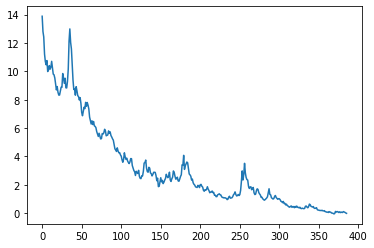

In [952]:
plt.plot (rule_growth)
plt.show